<a href="https://colab.research.google.com/github/Dhanraj7573/small-project-series-/blob/main/Sector_Comparison_with_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project compares how different stock market sectors perform over a chosen period.
We’ll pick a few companies, label each with its sector (like Technology, Energy, Healthcare), and then use real stock data from Yahoo Finance to see which sector had the highest average return.

The program will:

Download daily prices for several stocks using yfinance.

Calculate each stock’s total return for the selected time window.

Group the stocks by sector and find the average return for each group.

Display a simple table (and optionally a bar chart) showing which sectors performed best or worst.

The goal is to turn raw stock prices into a clear, easy-to-understand comparison of sector performance — a mini “league table” for sectors.

In [2]:
import yfinance as yf
from datetime import date, timedelta

SECTORS = {
  "technology": ['NVDA','MSFT','AAPL','AVGO','ORCL','PLTR','CSCO','IBM','AMD','CRM'],
  "energy":     ['XOM','CVX','COP','WMB','MPC','EOG','KMI','PSX','SLB','VLO'],
  "industrials":['GE','CAT','RTX','BA','ETN','HON','DE','LMT','NOC','EMR']
}

tickers = SECTORS["technology"] + SECTORS["energy"] + SECTORS["industrials"]


end_date = date.today()
start_date = end_date - timedelta(days=365)

stock_data = yf.download(tickers, start=start_date, end=end_date)

# Display the data
display(stock_data.head())

/tmp/ipython-input-468254572.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  30 of 30 completed


Price            Close                                                  \
Ticker            AAPL         AMD        AVGO          BA         CAT   
Date                                                                     
2024-10-07  220.663040  170.970001  173.379547  155.910004  392.044067   
2024-10-08  224.724136  172.800003  178.974655  154.649994  381.914429   
2024-10-09  228.476669  171.020004  184.143951  149.369995  390.016174   
2024-10-10  227.978973  164.179993  183.886490  146.619995  390.459167   
2024-10-11  226.495895  167.889999  179.717377  151.020004  395.755280   

Price                                                                  ...  \
Ticker             COP         CRM       CSCO         CVX          DE  ...   
Date                                                                   ...   
2024-10-07  111.136383  282.857910  51.189911  144.563232  400.412292  ...   
2024-10-08  107.338844  289.815796  51.404385  142.296082  394.732086  ...   
2024-10-09  107.503532  286.187714  52.213520  143.157028  399.860016  ...   
2024-10-10  108.365723  288.424164  52.194027  144.084930  400.136169  ...   
2024-10-11  107.038521  286.366669  52.886169  144.850220  405.382416  ...   

Price       Volume                                                            \
Ticker         NOC       NVDA     ORCL      PLTR      PSX      RTX       SLB   
Date                                                                           
2024-10-07  436200  346250200  6791000  44124800  1812900  4606100   8963600   
2024-10-08  422500  285722500  7845400  62542900  2528900  3194500  13404700   
2024-10-09  428500  246191600  8120900  86404700  1494300  3210400   9980700   
2024-10-10  372800  242311300  7115900  62516300  1416400  2785300   9707400   
2024-10-11  325100  170209500  5869400  66206900  1460600  2556200   8892300   

Price                                   
Ticker          VLO      WMB       XOM  
Date                                    
2024-10-07  1983100  4998700  15714400  
2024-10-08  4177700  5605100  14818500  
2024-10-09  2372300  4044300  11144900  
2024-10-10  2300900  4400100  10243300  
2024-10-11  1632000  9246600   8294800  

[5 rows x 150 columns]

In [3]:
# The total return is the percentage change from the first day's closing price to the last day's closing price

total_returns = (stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1

display(total_returns)

,0
Ticker,
AAPL,0.163267
AMD,0.191496
AVGO,0.935003
BA,0.409339
CAT,0.263582
COP,-0.146004
CRM,-0.131083
CSCO,0.346164
CVX,0.065416


In [4]:
#daily return for each stock
daily_returns = stock_data['Close'].pct_change()
daily_returns.dropna(inplace=True)
print(daily_returns.head())

Ticker          AAPL       AMD      AVGO        BA       CAT       COP  \
Date                                                                     
2024-10-08  0.018404  0.010704  0.032271 -0.008082 -0.025838 -0.034170   
2024-10-09  0.016698 -0.010301  0.028883 -0.034142  0.021214  0.001534   
2024-10-10 -0.002178 -0.039995 -0.001398 -0.018411  0.001136  0.008020   
2024-10-11 -0.006505  0.022597 -0.022672  0.030010  0.013564 -0.012247   
2024-10-14  0.016480 -0.015605  0.004573 -0.013442 -0.020073 -0.009232   

Ticker           CRM      CSCO       CVX        DE  ...       NOC      NVDA  \
Date                                                ...                       
2024-10-08  0.024599  0.004190 -0.015683 -0.014186  ... -0.002472  0.040479   
2024-10-09 -0.012519  0.015741  0.006050  0.012991  ... -0.000789 -0.001806   
2024-10-10  0.007815 -0.000373  0.006482  0.000691  ... -0.009657  0.016284   
2024-10-11 -0.007134  0.013261  0.005311  0.013111  ...  0.003054 -0.000074   
2024-10

In [7]:
# lets see the winner and looser stock and which days
import pandas as pd
import matplotlib.pyplot as plt
winner=daily_returns.idxmax()
looser=daily_returns.idxmin()

best_day=daily_returns.max()
worst_day=daily_returns.min()
dr = daily_returns.dropna(how="all")

# Build per-ticker summary in one go
summary = dr.agg(['idxmax', 'max', 'idxmin', 'min']).T
summary.columns = ['best_date', 'best_ret', 'worst_date', 'worst_ret']
summary['best_date'] = pd.to_datetime(summary['best_date']).dt.strftime('%d-%m-%Y')
summary['worst_date'] = pd.to_datetime(summary['worst_date']).dt.strftime('%d-%m-%Y')
summary[['best_ret', 'worst_ret']] *= 100

print(summary.round(2))



         best_date   best_ret  worst_date  worst_ret
Ticker                                              
AAPL    09-04-2025  15.328858  03-04-2025   -9.24562
AMD     09-04-2025   23.82048  30-10-2024 -10.616538
AVGO    13-12-2024  24.432636  27-01-2025 -17.396805
BA      09-04-2025  15.374136  03-04-2025 -10.471045
CAT     09-04-2025   9.881724  03-04-2025  -8.635635
COP     09-04-2025  10.706506  03-04-2025 -10.226193
CRM     04-12-2024  10.994791  03-04-2025  -6.006496
CSCO    09-04-2025   9.287465  03-04-2025  -6.676435
CVX     09-04-2025   6.645742  04-04-2025  -8.224431
DE      09-04-2025    9.58861  14-08-2025  -6.757012
EMR     09-04-2025  10.918751  03-04-2025  -8.651606
EOG     09-04-2025   8.660444  10-04-2025  -8.277073
ETN     09-04-2025  12.759443  27-01-2025 -15.564532
GE      09-04-2025  10.568576  04-04-2025 -11.096314
HON     09-04-2025   8.881124  04-04-2025  -7.591441
IBM     30-01-2025  12.964168  24-07-2025  -7.623846
KMI     06-11-2024   6.636997  27-01-2025  -9.

In [8]:
# now narrow it down which is the highest performing stock and which is the lowest performing stock

highest_performing_stock = summary.loc[summary['best_ret'].idxmax()]
lowest_performing_stock = summary.loc[summary['worst_ret'].idxmin()]

print("Highest Performing Stock:")
print(highest_performing_stock)

print("\nLowest Performing Stock:")
print(lowest_performing_stock)

Highest Performing Stock:
best_date     10-09-2025
best_ret        35.94882
worst_date    27-01-2025
worst_ret     -13.790856
Name: ORCL, dtype: object

Lowest Performing Stock:
best_date     13-12-2024
best_ret       24.432636
worst_date    27-01-2025
worst_ret     -17.396805
Name: AVGO, dtype: object


In [11]:
# Find the top 3 best performing stocks in the technology sector based on total return
tech_tickers = SECTORS['technology']
tech_total_returns = total_returns[tech_tickers]
top_3_tech_total_returns = tech_total_returns.nlargest(3)

# Find the top 3 worst performing stocks in the energy sector based on total return
energy_tickers = SECTORS['energy']
energy_total_returns = total_returns[energy_tickers]
worst_3_energy_total_returns = energy_total_returns.nsmallest(3)

print("Top 3 Best Performing Stocks in Technology Sector (Total Return):")
print(top_3_tech_total_returns.apply(lambda x: f"{x:.2%}"))

print("\nTop 3 Worst Performing Stocks in Energy Sector (Total Return):")
print(worst_3_energy_total_returns.apply(lambda x: f"{x:.2%}"))

Top 3 Best Performing Stocks in Technology Sector (Total Return):
Ticker
PLTR    361.64%
AVGO     93.50%
ORCL     73.35%
dtype: object

Top 3 Worst Performing Stocks in Energy Sector (Total Return):
Ticker
SLB    -21.85%
EOG    -15.08%
COP    -14.60%
dtype: object


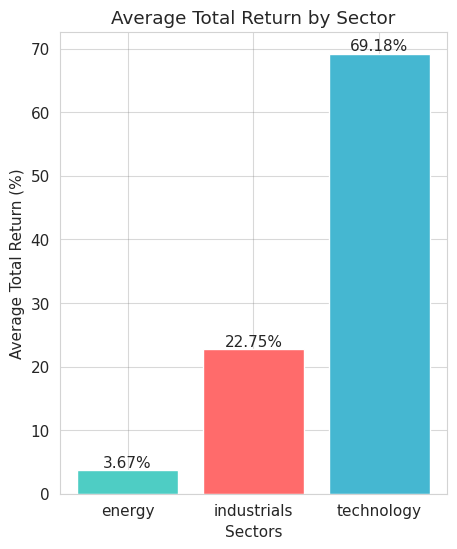

In [69]:
# sector returns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


s = list(sector_returns.keys()) # Gets: ['technology', 'energy', 'industrials']
r = list(sector_returns.values()) # Gets: ['technology', 'energy', 'industrials']

sorted_pairs = sorted(sector_returns.items(), key=lambda kv: kv[1])
s, r = zip(*sorted_pairs)   # s = sectors, r = returns (%)


plt.figure(figsize = (5,6))
bars = plt.bar(s,r,color = ['#4ECDC4', '#FF6B6B', '#45B7D1'])
plt.xlabel('Sectors')
plt.ylabel('Average Total Return (%)')
plt.title('Average Total Return by Sector')
plt.grid(True, alpha=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom')

plt.show()

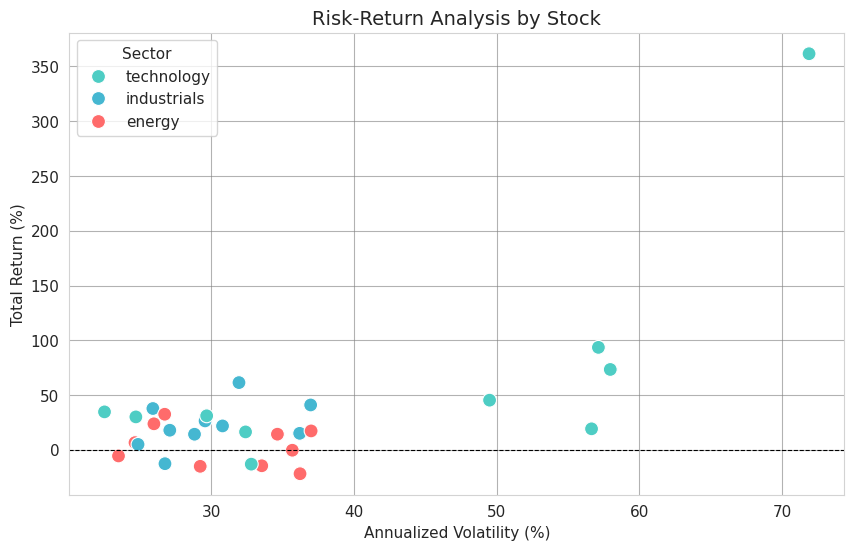

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom color palette
sector_colors = {'technology': '#4ECDC4', 'energy': '#FF6B6B', 'industrials': '#45B7D1'}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_summary, x='Volatility (%)', y='Total Return (%)', hue='Sector', palette=sector_colors, s=100)

plt.title('Risk-Return Analysis by Stock', fontsize=14)
plt.xlabel('Annualized Volatility (%)')
plt.ylabel('Total Return (%)')
plt.grid(True, alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8) # Add a horizontal line at 0 return
plt.legend(title='Sector')
plt.show()

/tmp/ipython-input-3709287568.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], data=df_summary, x='Sector', y='Volatility (%)', palette=sector_colors) # Reuse sector_colors if defined


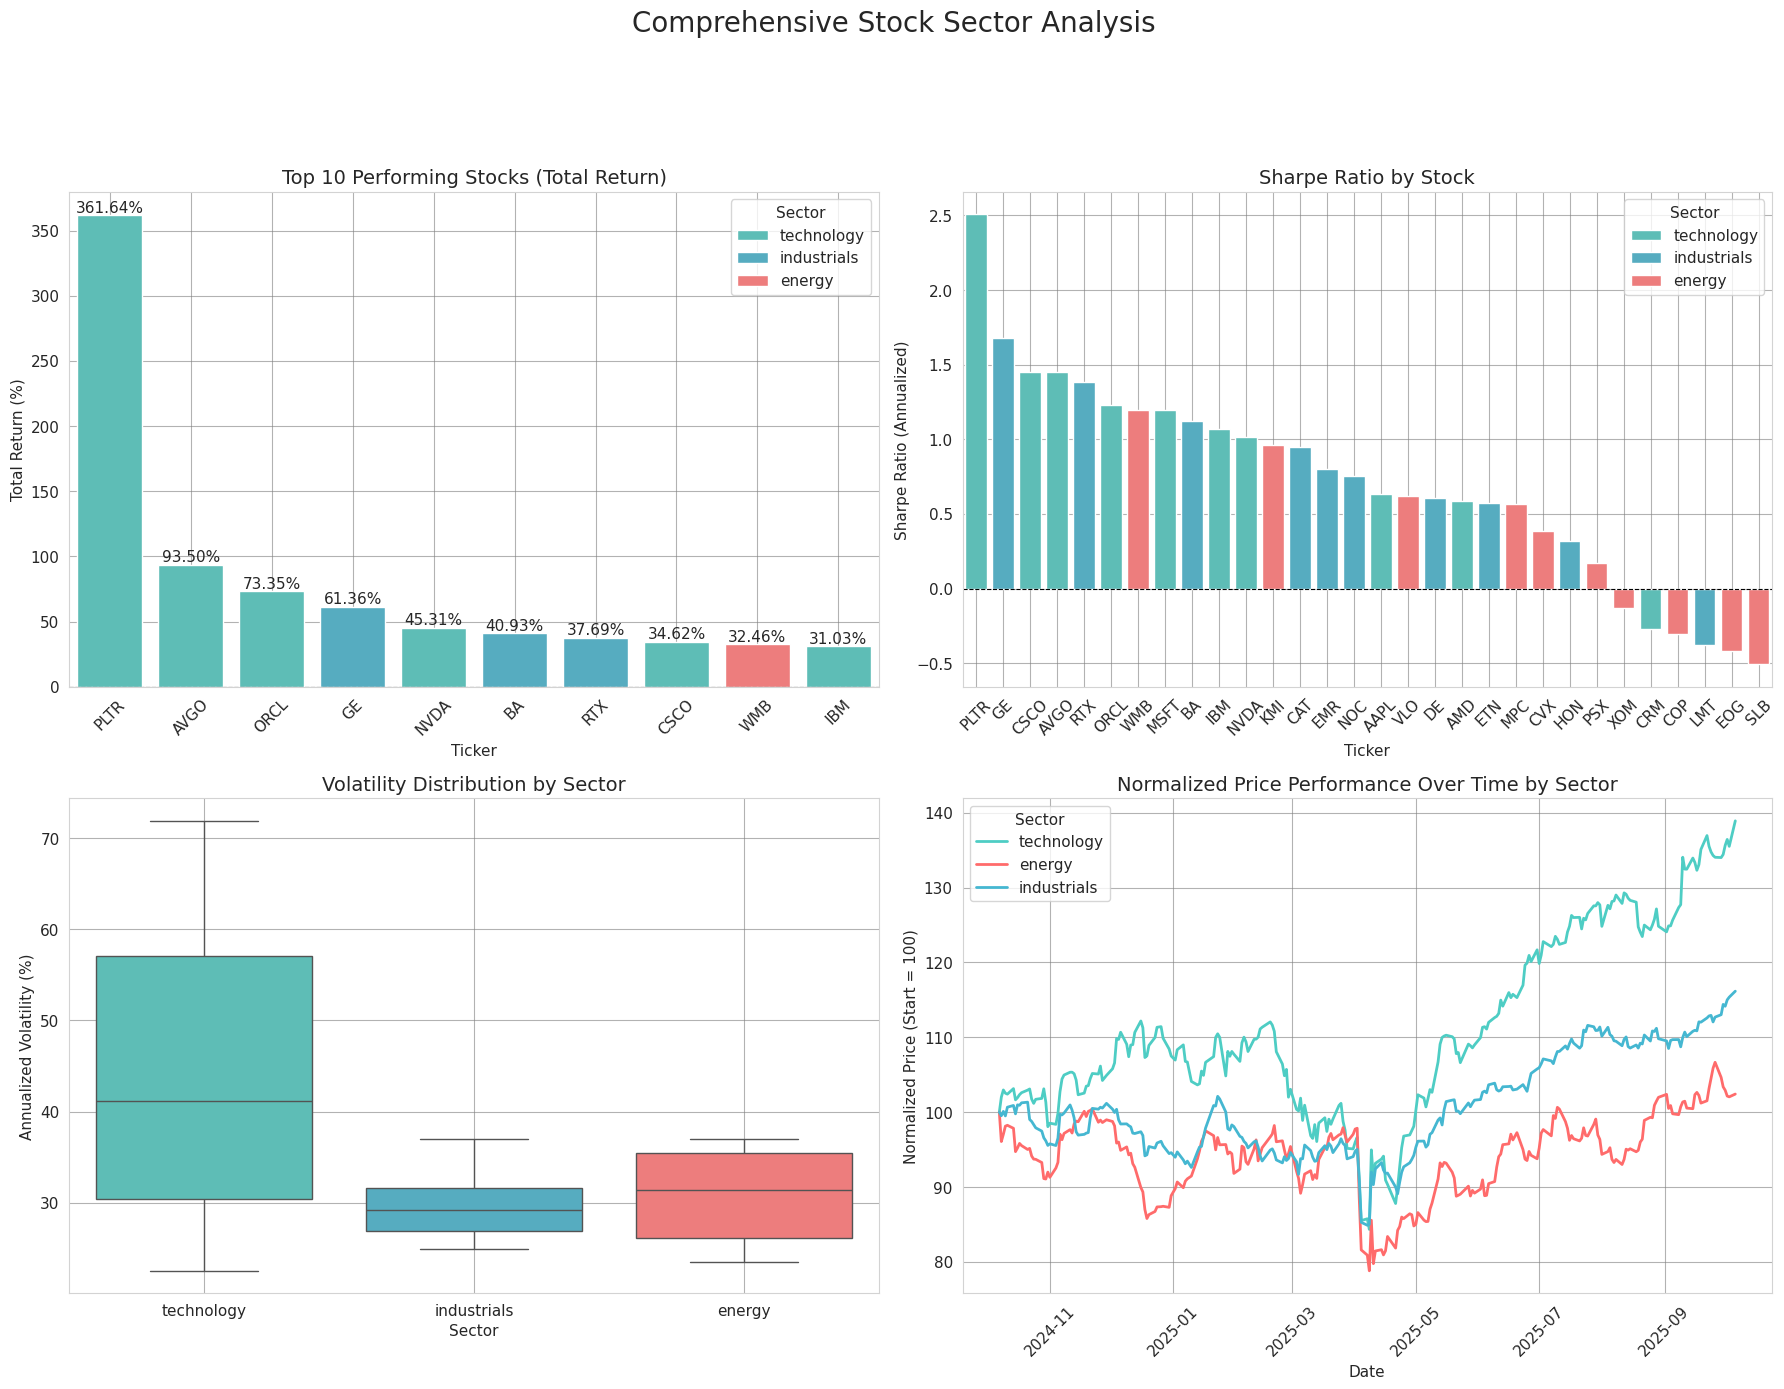

Top Performer from Each Sector (Total Return):
   Ticker       Sector  Total Return (%)
28    WMB       energy             32.46
13     GE  industrials             61.36
23   PLTR   technology            361.64


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming df_summary, daily_returns, stock_data, and SECTORS are available from previous cells

# Define the custom color palette
sector_colors = {'technology': '#4ECDC4', 'energy': '#FF6B6B', 'industrials': '#45B7D1'}

# Create a single figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # 2 rows, 2 columns

fig.suptitle('Comprehensive Stock Sector Analysis', fontsize=20, y=1.02) # Main title for the figure

# Flatten the axes array for easy iteration
axes = axes.flatten()

# 1. Top 10 Performers Bar Chart
sns.barplot(ax=axes[0], data=df_summary.nlargest(10, 'Total Return (%)'), x='Ticker', y='Total Return (%)', hue='Sector', palette=sector_colors, dodge=False)
axes[0].set_title('Top 10 Performing Stocks (Total Return)', fontsize=14)
axes[0].set_xlabel('Ticker')
axes[0].set_ylabel('Total Return (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.6)
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[0].legend(title='Sector')
# Add return values on top of each bar
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f%%')


# 2. Sharpe Ratio Comparison (for individual stocks)
# Calculate Sharpe Ratio for each stock
# Assuming daily_returns is available
risk_free_rate = 0.0 # Assuming risk-free rate is close to zero for simplicity over a year
sharpe_ratios = (daily_returns.mean() * 252 - risk_free_rate) / (daily_returns.std() * np.sqrt(252))

# Add Sharpe Ratio to df_summary (if not already added)
if 'Sharpe Ratio' not in df_summary.columns:
    df_summary['Sharpe Ratio'] = sharpe_ratios.values # Aligning by index is safer if not already aligned

sns.barplot(ax=axes[1], data=df_summary.sort_values('Sharpe Ratio', ascending=False), x='Ticker', y='Sharpe Ratio', hue='Sector', palette=sector_colors, dodge=False)
axes[1].set_title('Sharpe Ratio by Stock', fontsize=14)
axes[1].set_xlabel('Ticker')
axes[1].set_ylabel('Sharpe Ratio (Annualized)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.6)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
axes[1].legend(title='Sector')


# 3. Sector Volatility Box Plot
sns.boxplot(ax=axes[2], data=df_summary, x='Sector', y='Volatility (%)', palette=sector_colors) # Reuse sector_colors if defined
axes[2].set_title('Volatility Distribution by Sector', fontsize=14)
axes[2].set_xlabel('Sector')
axes[2].set_ylabel('Annualized Volatility (%)')
axes[2].grid(True, alpha=0.6)


# 4. Price Performance Over Time (Normalized)
for sector, tickers_list in SECTORS.items():
    # Calculate average price for the sector
    sector_prices = stock_data['Close'][tickers_list].mean(axis=1)
    # Normalize price performance
    normalized_performance = (sector_prices / sector_prices.iloc[0]) * 100
    axes[3].plot(normalized_performance.index, normalized_performance.values, label=sector, linewidth=2, color=sector_colors.get(sector)) # Added color from palette

axes[3].set_title('Normalized Price Performance Over Time by Sector', fontsize=14)
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Normalized Price (Start = 100)')
axes[3].legend(title='Sector')
axes[3].grid(True, alpha=0.6)
axes[3].tick_params(axis='x', rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()


# 5. Get top performer from each sector (This is printed output, not a graph)
print("Top Performer from Each Sector (Total Return):")
top_performer_by_sector = df_summary.loc[df_summary.groupby('Sector')['Total Return (%)'].idxmax()]
print(top_performer_by_sector[['Ticker', 'Sector', 'Total Return (%)']].round(2))

Summary

This project pulls one year of U.S. stock data directly from Yahoo Finance and compares performance across three sectors: Technology, Energy, and Industrials (manufacturing). I analyzed 30 companies (10 per sector).

What I did:

Calculated per-stock returns, then built daily close-to-close returns.

Found each stock’s best day and worst day (date + % move).

Identified the overall winner (highest single-day gain across all stocks) and the overall loser (largest single-day drop).

Computed sector-level returns by averaging member stocks, so we can see how Tech vs Energy vs Industrials performed over the same period.

Highlighted top performers in Technology and worst performers in Energy to make the results easy to read.

Outcome:

A clear snapshot of which sectors led or lagged over the last year.

A simple leaderboard of best/worst days and best/worst stocks across the 30-name universe.